# 反爬：驗證碼處理

* 了解「驗證碼機制」的反爬蟲機制
* 「驗證碼機制」反爬蟲的因應策略


## 作業目標

* 讀讀看「test」資料夾下的圖檔！
* 像 test/test2.png 這種複雜的圖片怎麼辦？


### 讀讀看「test」資料夾下的圖檔！

In [1]:
import requests
import pytesseract
from PIL import Image
from io import BytesIO
from IPython.display import display

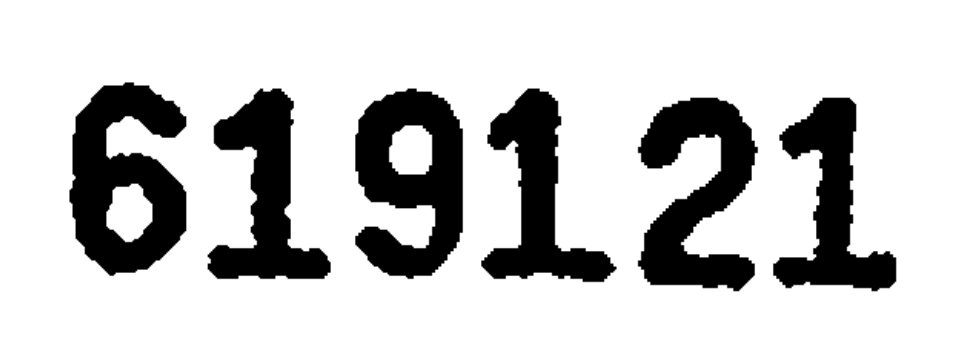

In [2]:
img = Image.open('./test/test1.png')
img

### 像 test/test2.png 這種複雜的圖片怎麼辦？

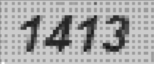

In [3]:
img = Image.open("./test/test2.png").convert("L")
img

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
code = pytesseract.image_to_string(img)
print(code)
# 數字辨識出來稍有錯誤

4413


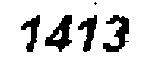

1413


In [5]:
# 定義黑白閾值，大於這個數值為黑色，小於這個數值為白色
threshold = 120

table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

# 圖片二值化
img_th = img.point(table, '1')
display(img_th)

code = pytesseract.image_to_string(img_th)
print(code)